# Exploratory Analysis of Financial Assets

This notebook performs an exploratory data analysis of historical financial market data.
The objective is to understand price behavior, return distributions, and basic risk characteristics
before applying formal risk models.

The analysis follows a structured and reproducible workflow commonly used in financial analytics.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
tickers=['AAPL','MSFT','GOOGL','SPY']
data=yf.download(tickers,start='2018-01-01',end='2026-01-01',auto_adjust=True)['Close']
data.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-02,40.341885,53.258095,79.050369,237.208206
2018-01-03,40.334854,54.166733,79.418266,238.708572
2018-01-04,40.522202,54.377140,80.117279,239.714722
2018-01-05,40.983574,55.098198,81.110550,241.312134
2018-01-08,40.831348,55.292725,81.193344,241.753448


In [4]:
data=data.dropna()
data.tail()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2025-12-24,273.809998,314.089996,488.019989,690.380005
2025-12-26,273.399994,313.510010,487.709991,690.309998
2025-12-29,273.760010,313.559998,487.100006,687.849976
2025-12-30,273.079987,313.850006,487.480011,687.010010
2025-12-31,271.859985,313.000000,483.619995,681.919983


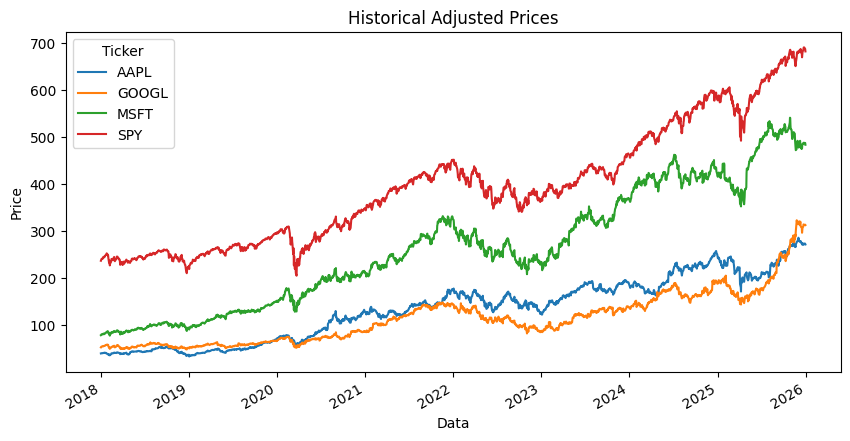

In [6]:
data.plot(figsize=(10,5))
plt.title('Historical Adjusted Prices')
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

In [7]:
log_returns=np.log(data/data.shift(1)).dropna()
log_returns.head()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-03,-0.000174,0.016917,0.004643,0.006305
2018-01-04,0.004634,0.003877,0.008763,0.004206
2018-01-05,0.011321,0.013173,0.012321,0.006642
2018-01-08,-0.003721,0.003524,0.001020,0.001827
2018-01-09,-0.000114,-0.001275,-0.000680,0.002261


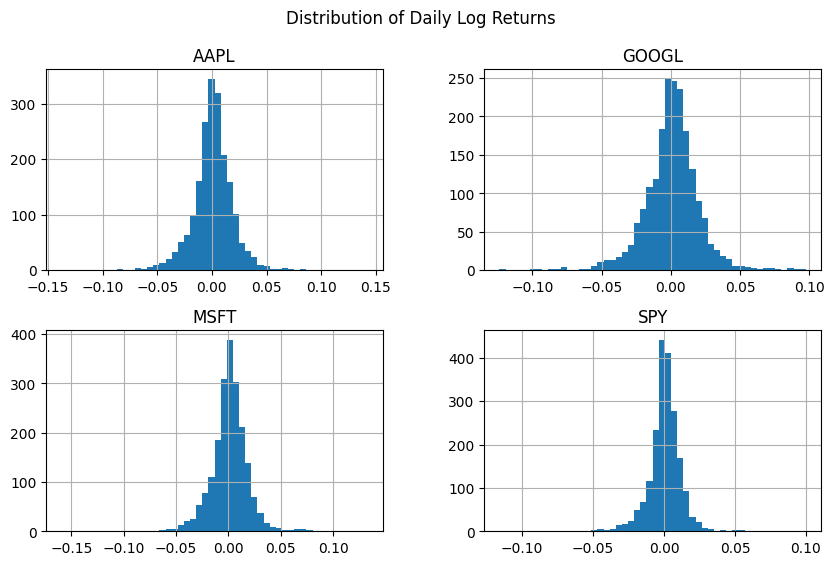

In [10]:
log_returns.hist(bins=50,figsize=(10,6))
plt.suptitle('Distribution of Daily Log Returns')
plt.show()

In [11]:
summary_stats=log_returns.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,2010.0,0.000949,0.019375,-0.137708,-0.007952,0.001181,0.010999,0.142617
GOOGL,2010.0,0.000881,0.019521,-0.123685,-0.008545,0.001414,0.011198,0.097348
MSFT,2010.0,0.000901,0.017851,-0.159453,-0.007421,0.001251,0.010213,0.132929
SPY,2010.0,0.000525,0.012287,-0.115887,-0.004315,0.000880,0.006495,0.099863
